In [1]:
#resample 6-days or 12-day frequency into 16-days frequency.


import pandas as pd
import numpy as np
import matplotlib.pylab as plt

%matplotlib inline
from matplotlib.pylab import rcParams
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



In [2]:
# modify  and rename to: DATE FORMAT YYYY-MM--DD
#use EXCEL to define DATE format and save as CSV file
# ----CONFIRM FORMAT, NOT IN EXCEL BUT IN NOTEPAD++-----
# follow directions from: https://www.youtube.com/watch?v=ngAE0dME9RA
#1.Open csv in excel and rename system:time_start column to DATE 
#2.Rename first three letters of month to spanish and and convert string into MYD
#3.then format-change to YYYY-MM-DD
#4.Save in xlsx format, then save in cvs format
#5.Confirm with Notapad date format YYYY-MM--DD
#6.Keep the date and a single column of S1 before uploading the file into Colab, rename that column to RADAR
#7.Define frequency below accordingly: 6D, 12D.


path=r"C:\Users\jesus\Downloads\trend_6days_both_vv.csv"  #to be used with windows and Anaconda
#path="/content/ee-chart (70).csv"
#path="/content/LosPericos_ascending_VH_230202.csv"
#path="/content/S1_ASCENDING_230206_n279.csv"

# read the file with pandas: pd.read_csv(path), location by defaul in Colab or Anaconda for Windows
data = pd.read_csv(path)
# apply the dtype attribute

data = pd.read_csv(path, index_col='DATE', parse_dates=True, infer_datetime_format=True).asfreq(freq='6D')
#data['DATE']=pd.to_datetime(data['DATE'], infer_datetime_format=True)#to be depracated
#data=data.set_index(['DATE'])

#Fill NaN data
data = data.fillna(method = 'ffill')

#define dates range if needed:

data = data[(data.index>'2017-06-01') & (data.index<'2023-01-31')]


print(data.head(15))
print(data.tail(15))

result_data_type = data.dtypes
print("Output:")
print(result_data_type)
len(data)


               RADAR
DATE                
2017-06-07 -6.391143
2017-06-13 -6.202429
2017-06-19 -6.273571
2017-06-25 -6.099429
2017-07-01 -6.151429
2017-07-07 -6.081857
2017-07-13 -6.249571
2017-07-19 -6.140857
2017-07-25 -6.344000
2017-07-31 -6.349143
2017-08-06 -6.370143
2017-08-12 -6.431857
2017-08-18 -6.545000
2017-08-24 -6.571286
2017-08-30 -6.624429
               RADAR
DATE                
2022-11-02 -6.208143
2022-11-08 -6.154000
2022-11-14 -6.135714
2022-11-20 -6.205143
2022-11-26 -6.170429
2022-12-02 -6.152286
2022-12-08 -6.199429
2022-12-14 -6.365714
2022-12-20 -6.502143
2022-12-26 -6.608571
2023-01-01 -6.591571
2023-01-07 -6.623714
2023-01-13 -6.649571
2023-01-19 -6.649571
2023-01-25 -6.649571
Output:
RADAR    float64
dtype: object


344

In [3]:
#next line aggregates,e.g, 6-day values into monthly (M) mean() values, it can also be sum()  
data=data['RADAR'].resample('16D').mean()# aggreagate into 16 days
print(data.head(15))

DATE
2017-06-07   -6.289048
2017-06-23   -6.110905
2017-07-09   -6.195214
2017-07-25   -6.354429
2017-08-10   -6.516048
2017-08-26   -6.520071
2017-09-11   -6.440619
2017-09-27   -6.411238
2017-10-13   -6.537714
2017-10-29   -6.473571
2017-11-14   -6.517810
2017-11-30   -6.827000
2017-12-16   -7.155905
2018-01-01   -7.332810
2018-01-17   -7.313786
Freq: 16D, Name: RADAR, dtype: float64


In [5]:
#Here I read again a csv file in order to assing, again, an index col with the new frequency
data.to_csv('resample_16days_both_trend_vv.csv')
#path="/content/data1.csv"
path=r"C:\Users\jesus\Downloads\resample_16days_both_trend_vv.csv"
data = pd.read_csv(path, index_col='DATE', parse_dates=True, infer_datetime_format=True).asfreq(freq='16D')

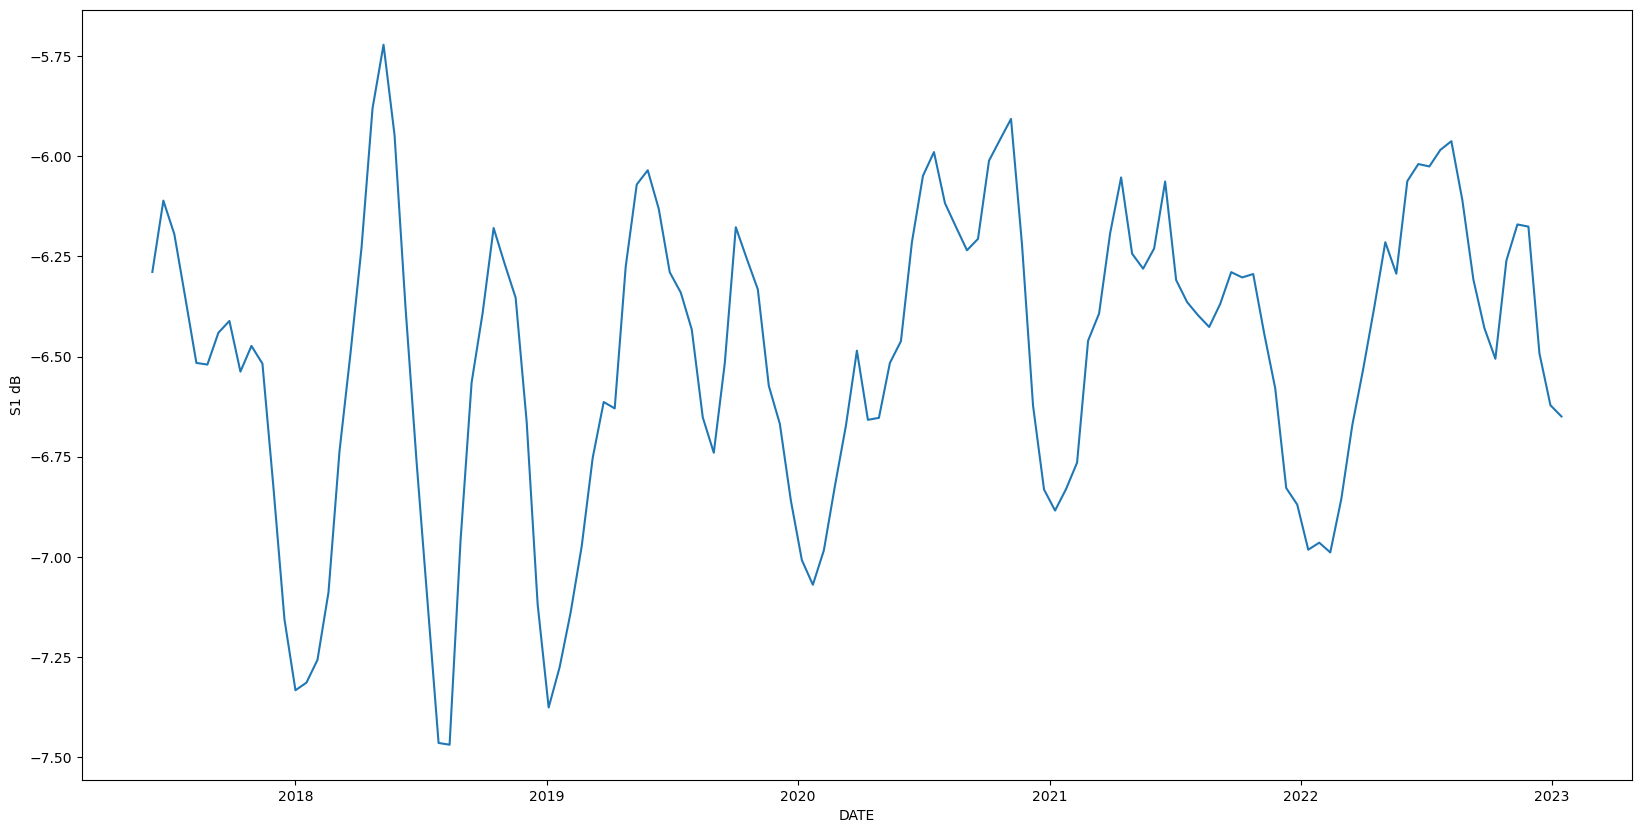

In [6]:
plt.figure(figsize=(20,10))
plt.xlabel("DATE")
plt.ylabel("S1 dB")
plt.plot(data['RADAR'])

In [ ]:
#define number of "dates" fo moving window
dates = 3

In [ ]:
# 61 dates (before present date), aproximately one year with 6-day data, to look for long term direction of mean and stdv

rolmean=data.rolling(window=dates).mean()
rolstd=data.rolling(window=dates).std()
# print 60 values for mean and 60 values for standard deviation
print(rolmean.tail(15))
print(rolstd.tail(15))

In [ ]:
plt.figure(figsize=(20,10))
actual=plt.plot(data, color='red', label='Actual')
mean_6=plt.plot(rolmean, color='green', label='Rolling Mean') 
std_6=plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [ ]:
data.dropna(inplace=True)